In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import math
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as web

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.core import Dropout

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-data/AMZN.csv


### Load Data

In [2]:
# Stock price of Apple from 2010/1/4 to 2021-02-26
df = pd.read_csv('../AMZN.csv')
df['Date'] = df['Date'].astype('datetime64[ns]')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
1,2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2,2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
3,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
4,2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500
...,...,...,...,...,...,...,...
2836,2021-04-12,3355.209961,3395.040039,3351.149902,3379.389893,3379.389893,3281800
2837,2021-04-13,3400.850098,3432.000000,3395.629883,3400.000000,3400.000000,3315800
2838,2021-04-14,3404.040039,3404.129883,3326.000000,3333.000000,3333.000000,3145200
2839,2021-04-15,3371.000000,3397.000000,3352.000000,3379.090088,3379.090088,3233600


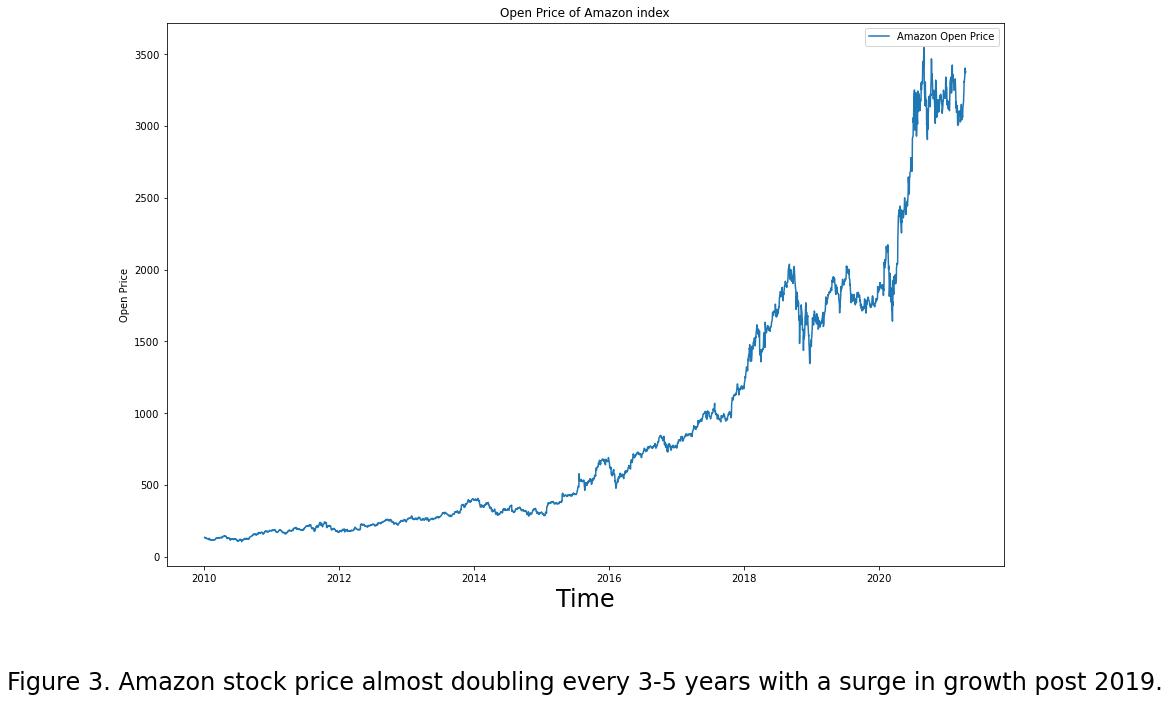

In [3]:
plt.figure(figsize=(15,10))
plt.plot(df['Date'], df['Open'], label='Amazon Open Price')
plt.xlabel('''Time\n\n 
Figure 3. Amazon stock price almost doubling every 3-5 years with a surge in growth post 2019.''', fontsize=24)
plt.ylabel('Open Price')
plt.title('Open Price of Amazon index')
plt.legend()
plt.show()

In [7]:
df['Date'].min()

Timestamp('2010-01-04 00:00:00')

In [8]:
df['Date'].max()

Timestamp('2021-04-16 00:00:00')

In [3]:
# Create a new dataframe with only the 'Open column 
data = df.filter(['Open'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .9384 ))

training_data_len

2666

In [4]:
df.loc[training_data_len]

Date         2020-08-06 00:00:00
Open                     3194.36
High                     3247.47
Low                      3165.43
Close                       3225
Adj Close                   3225
Volume                   3940600
Name: 2666, dtype: object

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00881121],
       [0.0079917 ],
       [0.00833171],
       ...,
       [0.95845479],
       [0.94885312],
       [0.95146858]])

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00881121, 0.0079917 , 0.00833171, 0.00757904, 0.00715766,
       0.00775631, 0.00670141, 0.00638464, 0.00674499, 0.00675662,
       0.00592258, 0.00616087, 0.00619865, 0.00571624, 0.00469912,
       0.00425158, 0.00438817, 0.00537623, 0.00692808, 0.00501298,
       0.00373721, 0.0032519 , 0.00369362, 0.00289154, 0.00390867,
       0.00356575, 0.00350763, 0.00327805, 0.00379533, 0.00410628,
       0.00323737, 0.00287992, 0.00348148, 0.00332455, 0.00351054,
       0.00349601, 0.00355703, 0.00347276, 0.00371105, 0.00554479,
       0.00565812, 0.00582668, 0.00674209, 0.00650089, 0.00687577,
       0.00673628, 0.00712569, 0.00821547, 0.00748895, 0.00735527,
       0.00769528, 0.00729134, 0.00807307, 0.00705304, 0.00725356,
       0.00659969, 0.00674499, 0.00841889, 0.00855548, 0.008663  ])]
[0.0087385609708608]

[array([0.00881121, 0.0079917 , 0.00833171, 0.00757904, 0.00715766,
       0.00775631, 0.00670141, 0.00638464, 0.00674499, 0.00675662,
       0.00592258, 0.00616087, 0.006

In [27]:
model = Sequential()
model.add(LSTM(230, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(70, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
2606/2606 [==============================] - 29s 10ms/step - loss: 0.0042
Epoch 2/3
2606/2606 [==============================] - 26s 10ms/step - loss: 8.1960e-04
Epoch 3/3
2606/2606 [==============================] - 25s 10ms/step - loss: 7.5384e-04


In [28]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print('Test RMSE:', rmse)

Test RMSE: 128.65683580091408


In [29]:
print(predictions[0:5])
df[training_data_len+1:training_data_len+5]

[[3083.7856]
 [3078.5305]
 [3083.314 ]
 [3087.3826]
 [3075.2039]]


,Date,Open,High,Low,Close,Adj Close,Volume
2667,2020-08-07,3224.010010,3240.810059,3140.669922,3167.459961,3167.459961,3936100
2668,2020-08-10,3170.310059,3172.510010,3101.520020,3148.159912,3148.159912,3167300
2669,2020-08-11,3113.199951,3159.219971,3073.000000,3080.669922,3080.669922,3718100
2670,2020-08-12,3108.000000,3174.389893,3101.419922,3162.239990,3162.239990,3527200


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


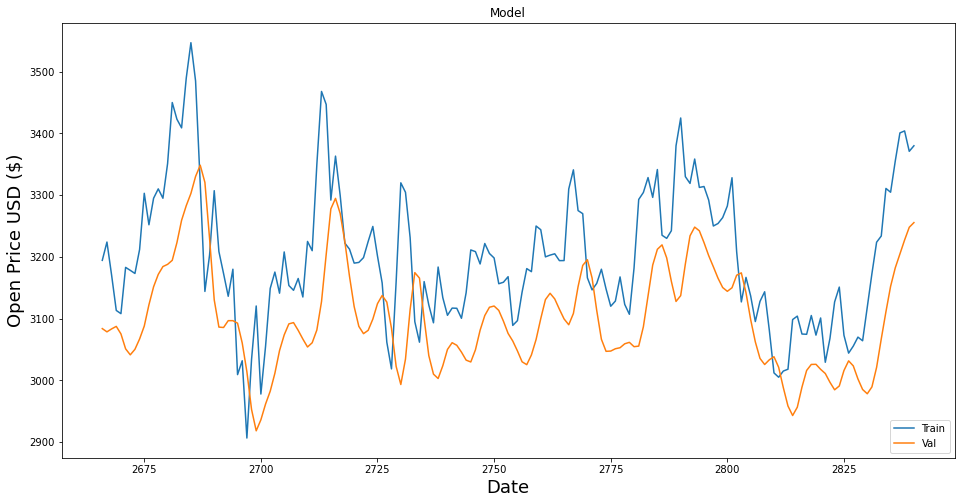

In [30]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
#plt.plot(train['Open'])
plt.plot(valid[['Open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### Agent

In [31]:
# Determine when to excecute the strategies
class LSTM_Agent:
    
    def __init__(self, wallet):
        self.data = None
        self.wallet = wallet # Amount of cash in hand
        self.portfolio = 0 # Company stock count
        self.current_market = None
        self.input = None # Prediction input
        self.scaler = MinMaxScaler(feature_range=(0,1))
        self.history = [[[],[]],[[],[]]] # 1st arr: Buy history; 2nd arr: sell history. [date, price]
        self.all_hist = [[],[]] # date prediction
        self.percent_gains = []
    
    # Check if the agent can buy the stock
    # Returns: Boolean. True if can buy, False if not
    def can_buy(self, unit):
        if unit == -1:
            if self.wallet >= self.current_market['Open']:
                return True
        else:
            if self.wallet >= unit*self.current_market['Open']:
                return True
        return False
    
    # Check if the agent can sell the stock
    # Returns: Boolean. True if can sell, False if not
    def can_sell(self, unit):
        if unit == -1:
            if self.portfolio > 0:
                return True
        else:
            if self.portfolio >= unit:
                return True
        return False
    
    # Buys x unit of stock. -1 to spend all
    def buy(self, unit):
        current_price = self.current_market['Open'] # price 1 stock
        # Update fields
        if unit == -1:
            unit = math.floor(self.wallet/current_price)
        self.wallet -= unit*current_price
        self.portfolio += unit
        self.history[0][0].append(self.current_market['Date'])
        self.history[0][1].append(current_price)
    
    # Sells x unit of stock. -1 to sell all
    def sell(self, unit):
        current_price = self.current_market['Open'] # price 1 stock
        # Update fields
        if unit == -1:
            unit = self.portfolio
        self.wallet += unit*current_price
        self.portfolio -= unit
        self.history[1][0].append(self.current_market['Date'])
        self.history[1][1].append(current_price)
    
    # Computes the total balance: wallet + holdings
    def total_balance(self):
        current_price = self.current_market['Open'] # price 1 stock
        return self.wallet + current_price*self.portfolio
    
    def shape_input(self, idx):
        #print('In Shape Input')
        temp = [np.array(self.data['Scaled_Open'].iloc[idx-60:idx])]
        self.input = np.reshape(temp, (1, 60, 1 ))
        #print(self.input)
        
    
    # Defines the buying/selling strategy
    # Buy when sma20 goes above sma50
    # Sell when sma20 goes below sma50
    def strategy(self):
        pred = model.predict(self.input)
        pred = self.scaler.inverse_transform(pred)[0][0]
        #print('pred', pred)
        self.all_hist[0].append(self.current_market['Date'])
        self.all_hist[1].append(pred)
        current_price = self.current_market['Open']
        #print('current_price', current_price)
        #print('Predict:', pred, 'Current:', current_price)
        percent_gain = 100*(pred-current_price)/current_price
        self.percent_gains.append(percent_gain)
        if percent_gain > 2 and self.can_buy(-1):
            # Buy signal
            #print('BUY! ','Predict:', pred, 'Current:', current_price)
            self.buy(-1)
        elif percent_gain < -2 and self.can_sell(-1):
            # sell signal
            #print('SELL! ','Predict:', pred, 'Current:', current_price)
            self.sell(-1)
    
    # Given a dataframe computes the buy and sell signals
    def deploy(self, data):
        scaled_data = self.scaler.fit_transform(data[['Open']].values)
        data['Scaled_Open'] = scaled_data
        self.data = data.reset_index()
        print(self.data.head())
        for (idx, row) in self.data.iterrows():
            self.current_market = data.iloc[idx]
            
            if idx > 59: # first day where model can make prediction
                self.shape_input(idx)
                self.strategy()
        
                #break
        return self.history

In [32]:
timeline1 = df[(df['Date'] >= '2011-10-14') & (df['Date'] <= '2013-08-01')]
timeline2 = df[(df['Date'] >= '2020-08-07') & (df['Date'] <= '2021-02-26')]
timeline_main = df[(df['Date'] >= '2020-08-07') & (df['Date'] <= '2021-04-16')]

In [33]:
# Subtracting 60 days from the intended test timeline as the model 
# requires 60 days worth of prior data to make predictions. 
timeline1 = df[390:901]
timeline2 = df[2607:2807]
timeline_main = df[2607:2841]

# Timeline Main

In [34]:
# Inputs
invest = 3000
agent = LSTM_Agent(invest)
buy_info, sell_info = agent.deploy(timeline_main)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   index       Date         Open         High          Low        Close  \
0   2607 2020-05-13  2366.800049  2407.699951  2337.800049  2367.919922   
1   2608 2020-05-14  2361.010010  2391.370117  2353.209961  2388.850098   
2   2609 2020-05-15  2368.520020  2411.000000  2356.370117  2409.780029   
3   2610 2020-05-18  2404.350098  2433.000000  2384.010010  2426.260010   
4   2611 2020-05-19  2429.830078  2485.000000  2428.969971  2449.330078   

     Adj Close   Volume  Scaled_Open  
0  2367.919922  4782900     0.004882  
1  2388.850098  3648100     0.000000  
2  2409.780029  4235000     0.006332  
3  2426.260010  4366600     0.036543  
4  2449.330078  4320500     0.058028  


In [35]:
# Check performance
print('Invested:', invest)
print('End of day total balance:', agent.total_balance())
print('Percentage gain:', 100*(agent.total_balance()-invest)/invest, '%')

print()
#print('Baseline:', 100*(timeline_main.iloc[-1].Open-timeline_main.iloc[0].Open)/timeline_main.iloc[0].Open, '%')

Invested: 3000
End of day total balance: 4050.809815
Percentage gain: 35.026993833333336 %



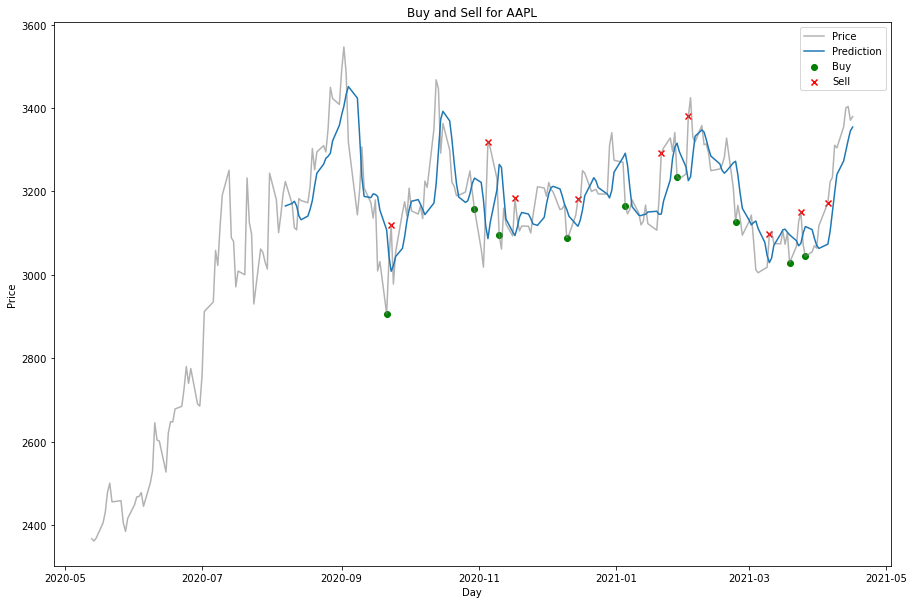

In [36]:
# Visualize SMAs and prices
plt.figure(figsize=(15,10))
plt.plot(timeline_main[['Date']], timeline_main[['Open']], label='Price', c='grey', alpha=0.6)
plt.scatter(buy_info[0], buy_info[1], marker='o', label='Buy', c='green')
plt.scatter(sell_info[0], sell_info[1], marker='x', label='Sell', c='red')

plt.plot(agent.all_hist[0], agent.all_hist[1], label='Prediction')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Buy and Sell for AAPL')
plt.legend()
plt.show()

# Timeline 2

In [37]:
# Inputs
invest = 3000
agent = LSTM_Agent(invest)
buy_info, sell_info = agent.deploy(timeline2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   index       Date         Open         High          Low        Close  \
0   2607 2020-05-13  2366.800049  2407.699951  2337.800049  2367.919922   
1   2608 2020-05-14  2361.010010  2391.370117  2353.209961  2388.850098   
2   2609 2020-05-15  2368.520020  2411.000000  2356.370117  2409.780029   
3   2610 2020-05-18  2404.350098  2433.000000  2384.010010  2426.260010   
4   2611 2020-05-19  2429.830078  2485.000000  2428.969971  2449.330078   

     Adj Close   Volume  Scaled_Open  
0  2367.919922  4782900     0.004882  
1  2388.850098  3648100     0.000000  
2  2409.780029  4235000     0.006332  
3  2426.260010  4366600     0.036543  
4  2449.330078  4320500     0.058028  


In [38]:
# Check performance
print('Invested:', invest)
print('End of day total balance:', agent.total_balance())
print('Percentage gain:', 100*(agent.total_balance()-invest)/invest, '%')

print()
#print('Baseline:', 100*(timeline2.iloc[-1].Open-timeline2.iloc[0].Open)/timeline2.iloc[0].Open, '%')

Invested: 3000
End of day total balance: 3796.809815
Percentage gain: 26.56032716666667 %



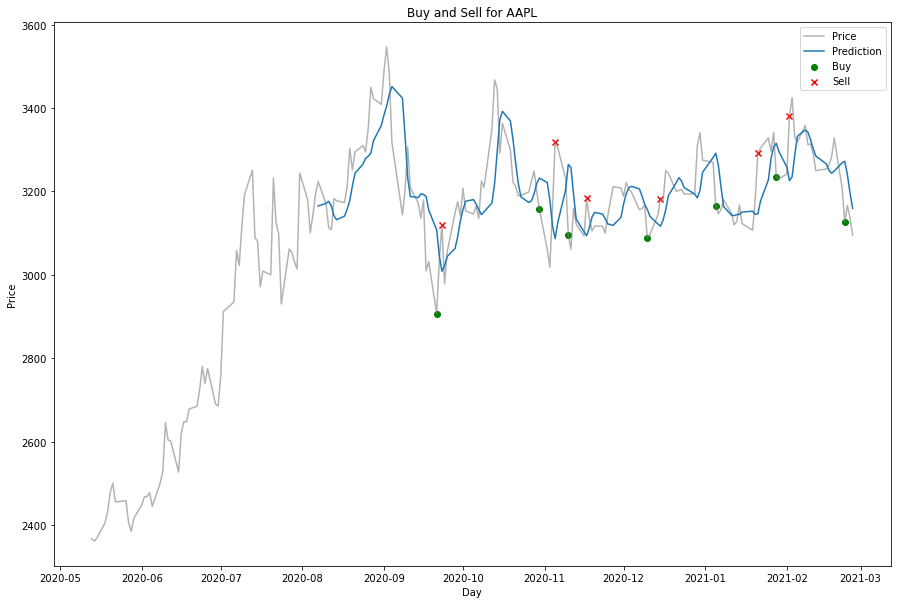

In [39]:
# Visualize SMAs and prices
plt.figure(figsize=(15,10))
plt.plot(timeline2[['Date']], timeline2[['Open']], label='Price', c='grey', alpha=0.6)
plt.scatter(buy_info[0], buy_info[1], marker='o', label='Buy', c='green')
plt.scatter(sell_info[0], sell_info[1], marker='x', label='Sell', c='red')

plt.plot(agent.all_hist[0], agent.all_hist[1], label='Prediction')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Buy and Sell for AAPL')
plt.legend()
plt.show()

# Timeline 1

In [40]:
# Inputs
invest = 3000
agent = LSTM_Agent(invest)
buy_info, sell_info = agent.deploy(timeline1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


   index       Date        Open        High         Low       Close  \
0    390 2011-07-21  216.740005  217.089996  211.070007  213.210007   
1    391 2011-07-22  213.860001  217.949997  211.110001  216.520004   
2    392 2011-07-25  215.490005  216.080002  213.000000  213.490005   
3    393 2011-07-26  214.990005  215.600006  210.350006  214.179993   
4    394 2011-07-27  224.389999  227.199997  219.619995  222.520004   

    Adj Close    Volume  Scaled_Open  
0  213.210007   4545300     0.333121  
1  216.520004   3591700     0.312761  
2  213.490005   3342800     0.324284  
3  214.179993   9863600     0.320749  
4  222.520004  12955600     0.387204  


In [41]:
# Check performance
print('Invested:', invest)
print('End of day total balance:', agent.total_balance())
print('Percentage gain:', 100*(agent.total_balance()-invest)/invest, '%')

print()
#print('Baseline:', 100*(timeline2.iloc[-1].Open-timeline2.iloc[0].Open)/timeline2.iloc[0].Open, '%')

Invested: 3000
End of day total balance: 4474.579452000001
Percentage gain: 49.152648400000025 %



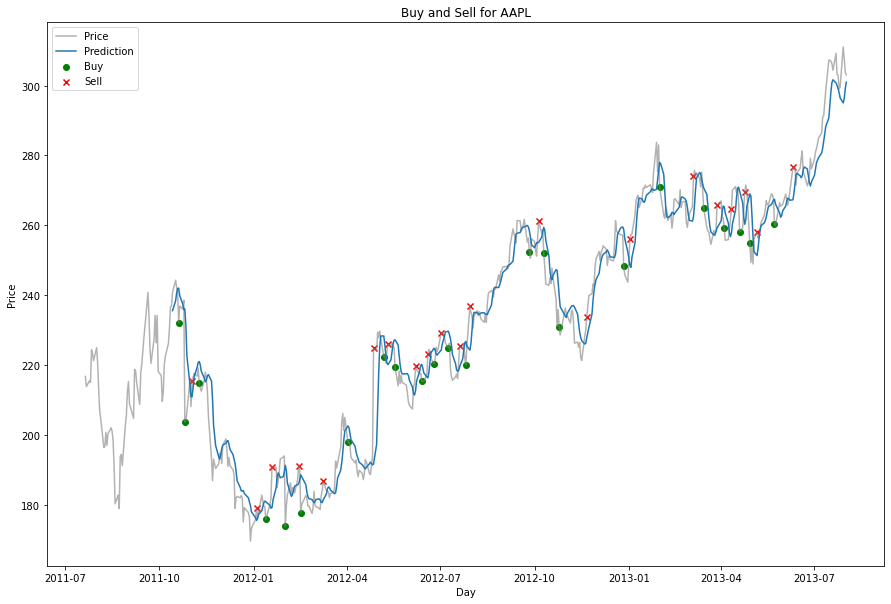

In [42]:
# Visualize SMAs and prices
plt.figure(figsize=(15,10))
plt.plot(timeline1[['Date']], timeline1[['Open']], label='Price', c='grey', alpha=0.6)
plt.scatter(buy_info[0], buy_info[1], marker='o', label='Buy', c='green')
plt.scatter(sell_info[0], sell_info[1], marker='x', label='Sell', c='red')

plt.plot(agent.all_hist[0], agent.all_hist[1], label='Prediction')

plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Buy and Sell for AAPL')
plt.legend()
plt.show()